# Lab 2 – Essential Tools and Practices for Programming Projects in AI

Author: Rim Slama Salmi

Last modified: September 14, 2025

**Objectives**
- Manage virtual environments properly (with Conda or venv) to ensure reproducibility.
- Set up a Python project following best practices.
- Use Git and GitHub to ensure collaborative project tracking.
- Apply collaborative work with branch management and conflict resolution
  
**Resources**

- [Getting started with VS Code](https://code.visualstudio.com/docs/getstarted/getting-started)  
- [Create a conda environment in the terminal](https://code.visualstudio.com/docs/python/environments#_create-a-conda-environment-in-the-terminal)  
- [Git management in Visual Studio Code](https://code.visualstudio.com/docs/sourcecontrol/overview)  



## 01 - Project setup (virtual env & Git/Github)

### 1.1 Load and open the project folder in VS Code
- Load DSPAP_Lab2 from Moodle
- Rename it to **DSPAP_Lab2_YourName**
- Open **VS Code** → `File` → `Open Folder…` → select **DSPAP_Lab2_YourName**  


### 1.2 Activate Lab2 environment or create it from `.yml` file  

- In the VS Code terminal, make sure you have a dedicated environment for **Lab2**.  

👉 If it does not exist yet, create it with:  
- Option 1: If you already have a Lab2.yml file, you can recreate the environment directly:
```bash
conda env create -f Lab2.yml
```
- Option2: Create it for the first time with:  
```bash
conda create -n Lab2_yourName python=3.11 numpy pandas matplotlib pyyaml scikit-learn ipykernel
```



### 1.3 Start version control
- VS Code interface: open the Source Control panel → Initialize Repository → Stage → Commit

- Command line:
```bash
    git init
    git add .
    git commit -m "Initial commit"
```

### 1.4 Connect to GitHub
- Publish repository from VS Code → choose your account → set Private visibility


### 1.5 Add a .gitignore (if not already)
- Create a .gitignore file and include:*.txt
- Commit with message

### 1.6 Sync changes to GitHub
- In the Source Control panel, click Sync Changes (🔄)

 
## 2 – Best Practices in AI Project Management & Code
⚠️ All operations must be tracked with explicit commits.


- This lab uses a reduced subset of the Open Food Facts (France) database, which you already worked with in Lab 1.
- For this session, we focus on a France-specific subset containing selected columns on metadata, nutrients, and scores.
- The dataset provided (cleaned.csv) has already been cleaned, with missing values removed.

In [2]:
#Imports 
# THIS CELL IS ONLY FOR IMPORTS DO NOT CHANGE IT
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
import yaml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
from IPython.display import display

In [4]:
#paths
DATASET_PATH="../DATA/cleaned.csv"
YML_path = "../YAML/config.yaml"

### 2.1 Project organization

👉 Instruction:  
- Rename your project folder to **DSPAP_Lab2_YourName** (*replace `YourName` with your own name*).  
- If some of your files have names that are not meaningful (e.g. `test1.ipynb`, `data123.csv`), **rename them with clear, descriptive names** (e.g. `data_cleaned.csv`, `analysis.ipynb`).  
- Then, place your files into a clean and consistent folder structure, here an example of good structure:

  
    DSPAP_Lab2/

    ├─ data/           # datasets

    ├─ notebooks/      # Jupyter notebooks

    ├─ src/            # Python modules (.py)

    ├─ config/         # configuration files

    └─ README.md


### 2.2 **Load** the dataset from cleaned.csv, **display** a few sample rows, and **check** the shape of the data (number of rows and columns).
Load the CSV into a DataFrame `df`. 
 Use the `pd.read_csv()` function. 

 Explore it 

In [5]:
# TODO 2.2
# 1. Load the dataset from 'cleaned.csv' into a DataFrame (use pandas)
og_df = pd.read_csv(DATASET_PATH)


# 2. Display the first few rows of the dataset
print("5 sample rows of the dataset:")
display(og_df.sample(5))


# 3. Print the shape of the dataset (rows, columns)
print(f"Dataset shape: {og_df.shape}")

5 sample rows of the dataset:


,product_name,brands,pnns_groups_1,pnns_groups_2,energy-kcal_100g,sugars_100g,fat_100g,saturated-fat_100g,salt_100g,fiber_100g,proteins_100g,nutriscore_grade,nova_group,environmental_score_grade,unique_scans_n
16558,Girolles,Sabarot,Fruits and vegetables,Vegetables,73.0,2.0,1.0,0.1,0.5080,7.0,3.8,a,4.0,a,1.0
59449,Pain de mie nature,Yami,Cereals and potatoes,Bread,283.0,3.7,5.8,0.7,1.1000,1.5,9.8,c,4.0,b,2.0
111466,Wavy Potato Chips,San carlo,Salty snacks,Appetizers,502.0,0.9,27.0,9.3,1.3000,4.5,6.3,e,3.0,c,1.0
99599,Cakes à la fraise,Boni,Sugary snacks,Biscuits and cakes,420.0,34.0,17.0,1.6,0.7500,1.3,4.0,d,4.0,c,4.0
105653,"Le Bon Paris, jambon cuit supérieur","Nestlé, Herta, Le Bon Paris",Fish Meat Eggs,Processed meat,104.0,0.4,1.9,1.0,1.9304,0.5,21.0,c,4.0,e,2.0


Dataset shape: (121501, 15)


### 2.2 Remember and execute PCA main operations from TP1 


From the full dataset, we now focus on a subset of **nutritional features** that will be used for analysis and modeling.  
We create a clean DataFrame with only these columns, extract the underlying numerical values into a NumPy array `X`, and check its shape (rows × columns).

1. **Select features**  
   - Nutrients: `sugars_100g`, `fat_100g`, `salt_100g`, `proteins_100g`, `energy-kcal_100g`, `fiber_100g`  
   - Drop rows with missing values before building the feature matrix.

2. **Standardize**  
   - Use `StandardScaler` to center and scale features.  
   - Standardization is important because nutrients are in different units (g, kcal, etc.).  
   - 📖 [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

3. **Fit PCA**  
   - Run `PCA()` on the standardized data.  
   - Plot both the explained variance ratio (per component) and the cumulative ratio.  
   - These show how much information each principal component captures.  
   - 📖 [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [6]:
#(run this cell)
#1. **Select features**  
#code from solution Lab1 goes here
feats = ["sugars_100g","fat_100g","salt_100g","proteins_100g","energy-kcal_100g","fiber_100g"]
df_notna = og_df[feats].dropna().copy()
X = df_notna.values
X.shape

(121501, 6)

In [7]:
#2. **Standardize**  
#code from solution Lab1 goes here
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs.shape, Xs.mean(axis=0), Xs.std(axis=0)

((121501, 6),
 array([ 3.36847117e-17,  2.24564745e-17,  1.26317669e-17, -5.14627540e-18,
        -1.40352965e-18, -2.24564745e-17]),
 array([1., 1., 1., 1., 1., 1.]))

In [8]:
#3. **Fit PCA**  
#code from solution Lab1 goes here
pca = PCA().fit(Xs)
evr = pca.explained_variance_ratio_
evr

array([0.27798905, 0.17230991, 0.16666725, 0.16055631, 0.13458055,
       0.08789693])

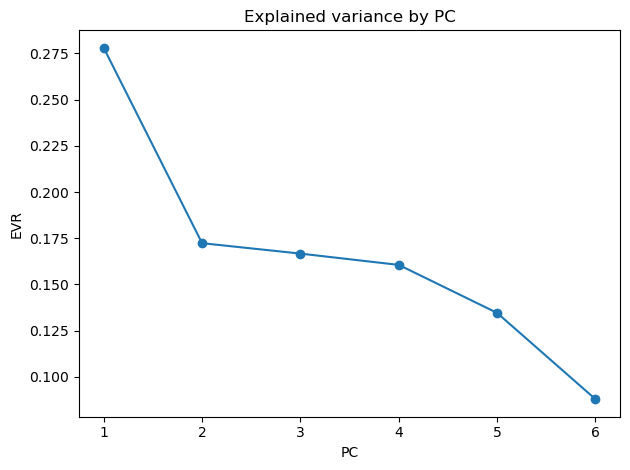

In [9]:
# **Explained Ratio*  
#code from solution Lab1 goes here
plt.plot(range(1, len(evr)+1), evr, marker="o")
plt.title("Explained variance by PC")
plt.xlabel("PC"); plt.ylabel("EVR")
plt.tight_layout()
plt.show()

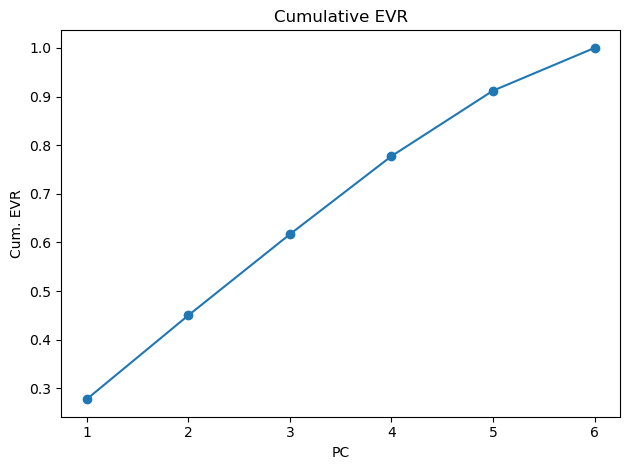

In [10]:
# cumulative explained variance ratio
#code from solution Lab1 goes here
plt.plot(range(1, len(evr)+1), np.cumsum(evr), marker="o")
plt.title("Cumulative EVR")
plt.xlabel("PC")
plt.ylabel("Cum. EVR")
plt.tight_layout()
plt.show()

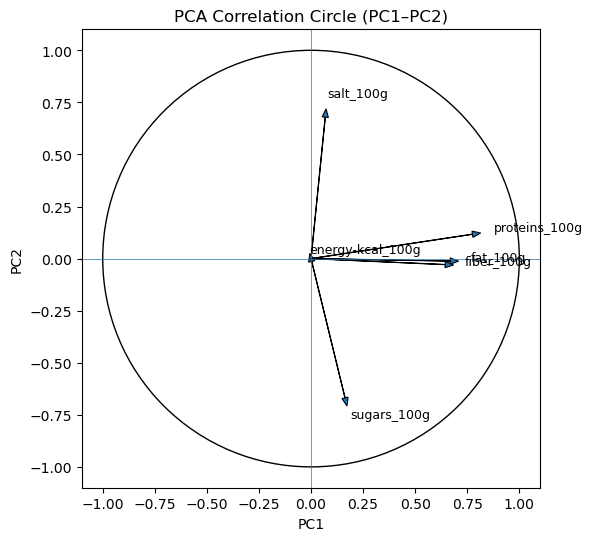

In [11]:
#display Correlation circle
#code from solution Lab1 goes here
loadings = pd.DataFrame(pca.components_.T, index=feats, columns=[f"PC{i+1}" for i in range(pca.components_.shape[0])])
eigvals = pca.explained_variance_
coords = loadings[["PC1","PC2"]].values * np.sqrt(eigvals[:2])
fig, ax = plt.subplots(figsize=(6,6))
circ = plt.Circle((0,0), 1.0, fill=False, linewidth=1.0); ax.add_artist(circ)
ax.axhline(0, linewidth=0.5); ax.axvline(0, linewidth=0.5)
for (x,y), name in zip(coords, feats):
    ax.arrow(0,0,x,y, head_width=0.03, head_length=0.04, length_includes_head=True, linewidth=0.8)
    ax.text(x*1.08, y*1.08, name, fontsize=9)
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_aspect("equal", adjustable="box")
ax.set_xlim(-1.1,1.1); ax.set_ylim(-1.1,1.1); ax.set_title("PCA Correlation Circle (PC1–PC2)")
plt.tight_layout(); plt.show()

### 2.3 Display PCA correlation circle (axes 1–2) from TP1.

In [12]:
#(run this cell)
#code from solution goes here

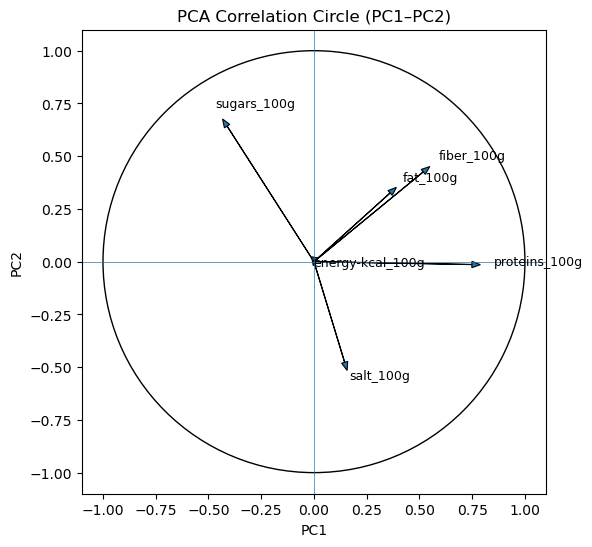

### 2.4 Write a commented function to automate correlation circle display and give example usage for axes 1–2, 2–3, 1-3.
💡 *Hints & Recommendations:*  
- Use **snake_case** for the function name and variables.
- Add a **docstring** at the start of your function explaining what it does, its inputs, and outputs.  
- Comment important steps inside the function (data extraction, plotting, labeling).  
- Test your function with different axes combinations: (1–2), (2–3), (1–3).  
  
Here’s how to write a clean and well-documented function that adds two numbers:
```python
def add_two_numbers(a, b):
    """
    Return the sum of two numbers.

    Parameters
    ----------
    a : int or float
        First number.
    b : int or float
        Second number.

    Returns
    -------
    int or float
        The sum of a and b.
    """
    # Add the two inputs
    result = a + b

    # Return the result
    return result
```
Example usage
```python
print(add_two_numbers(3, 5))     # 8
```

In [13]:
# TODO 2.4
def plot_correlation_circle(study_df, interest_cols, first_axis=1, second_axis=2):
    """
    Plot the PCA correlation circle for any pair of principal axes.

    WARNING /!\ This function needs the following libraries to be imported beforehand :
        _ pandas as pd
        _ matplotlib.pyplot as plt
        _ StandardScaler from sklearn.preprocessing
        _ PCA from sklearn.decomposition
    
    Parameters
    ----------
    study_df : pd.DataFrame
        The original dataframe containing the data.
    
    interest_cols : list of str
        List of column names to include in the PCA.

    first_axis : int, optional (default=1)
        The first principal component axis to plot.
    
    second_axis : int, optional (default=2)
        The second principal component axis to plot.

    Returns
    -------
    None. Displays the correlation circle plot.
    """
    
    # Checking for required imports
    import sys
    if 'pd' not in globals():
        raise ImportError("pandas must be imported as 'pd'")
    if 'plt' not in globals():
        raise ImportError("matplotlib.pyplot must be imported as 'plt'")
    if 'StandardScaler' not in globals():
        raise ImportError("StandardScaler must be imported from sklearn.preprocessing")
    if 'PCA' not in globals():
        raise ImportError("PCA must be imported from sklearn.decomposition")

    # Selecting the interesting columns in the original dataframe
    df_notna = study_df[interest_cols].dropna().copy()
    X = df_notna.values

    # Standardizing the data in case they are not on the same scale or units
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    # Fitting the PCA on the standardized data
    pca = PCA().fit(Xs)
    evr = pca.explained_variance_ratio_

    # Plotting the PCA circle for the given axes
    loadings = pd.DataFrame(pca.components_.T, index=feats, columns=[f"PC{i+1}" for i in range(pca.components_.shape[0])])
    eigvals = pca.explained_variance_
    coords = loadings[[f"PC{first_axis}",f"PC{second_axis}"]].values * np.sqrt(eigvals[:2])
    fig, ax = plt.subplots(figsize=(6,6))
    circ = plt.Circle((0,0), 1.0, fill=False, linewidth=1.0); ax.add_artist(circ)
    ax.axhline(0, linewidth=0.5); ax.axvline(0, linewidth=0.5)
    for (x,y), name in zip(coords, feats):
        ax.arrow(0,0,x,y, head_width=0.03, head_length=0.04, length_includes_head=True, linewidth=0.8)
        ax.text(x*1.08, y*1.08, name, fontsize=9)
    ax.set_xlabel(f"PC{first_axis}"); ax.set_ylabel(f"PC{second_axis}"); ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-1.1,1.1); ax.set_ylim(-1.1,1.1); ax.set_title(f"PCA Correlation Circle (PC{first_axis}–PC{second_axis})")

    plt.tight_layout(); plt.show()


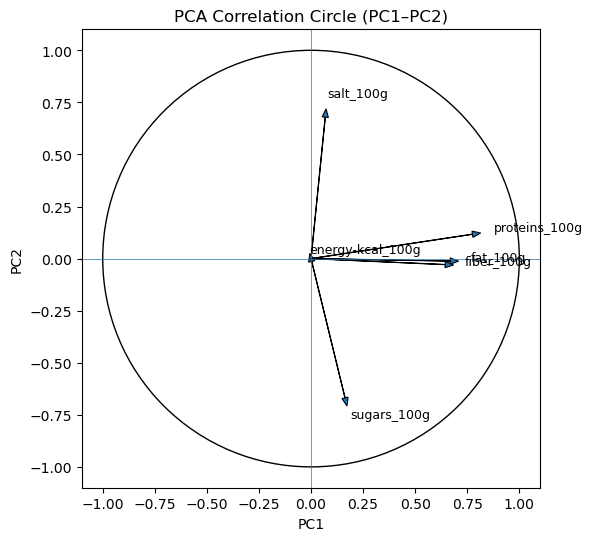

In [14]:
plot_correlation_circle(og_df, feats)

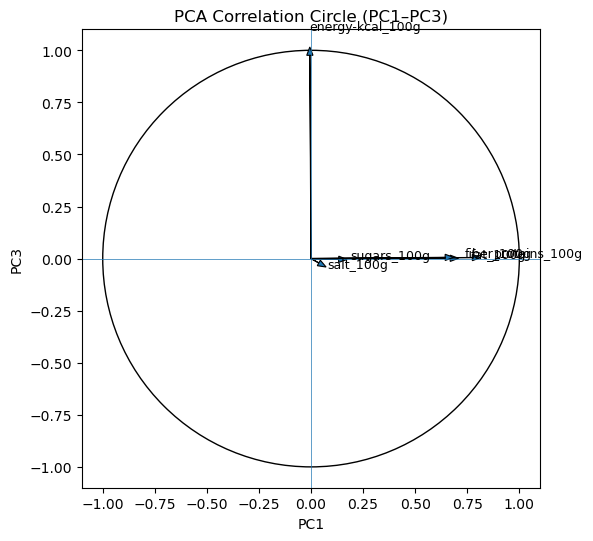

In [15]:
plot_correlation_circle(og_df, feats, 1, 3)

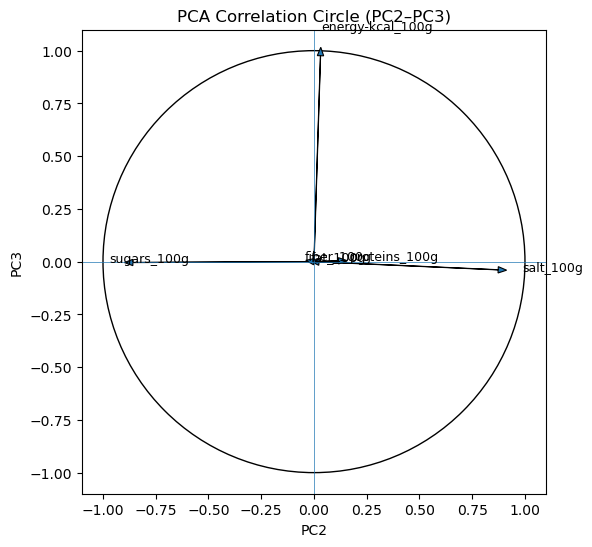

In [16]:
plot_correlation_circle(og_df, feats, 2, 3)

### 2.4 Place the function inside the corresponding folder, in a dedicated Python module. 

In [17]:
####TODO
#Write here the **name of your file** where you put the function and its **location** in the project structure

# file name : "pca_plot.py"
# location : "../PyFUNCTIONS/pca_plot.py"

### 2.5  Import the function you created from the Python file in the `src/` folder.  Call it to display the **correlation circle for PCA axes 1 and 3**.  

💡 Example of importing a function from a Python module
  ```python
  from folder.module_name import function_name
```
💡 Recommendation:
To avoid errors if the file or function is not found, wrap your import in a try/except block


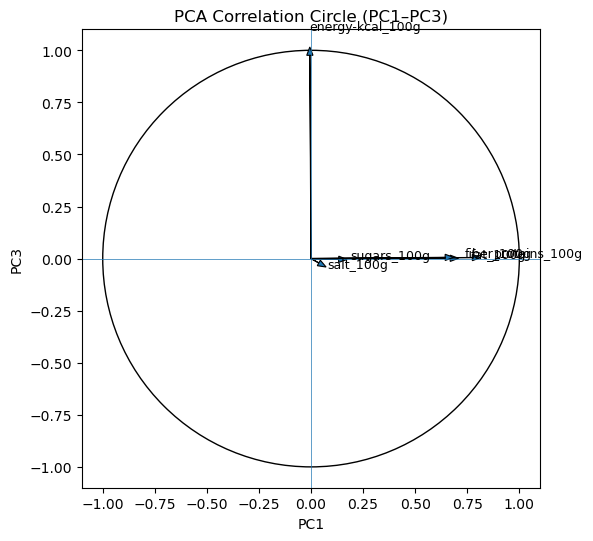

In [18]:
### TODO

# Import your function from the Python file you created and call it to display the correlation circle for PCA axes 1 and 3.

try:
    import sys
    sys.path.append("..")
    from PyFUNCTIONS.pca_plot import plot_correlation_circle_file

    plot_correlation_circle_file(og_df, feats, 1, 3)

except:
    plot_correlation_circle(og_df, feats, 1, 3)

### 2.6 Update notebook to read CSV path and number of PCA components from config.yaml
- **Reload** the dataset from the path specified in YAML.  
- Get `data_path` and `n_components` from config  
- **Redo** the **PCA** on your feature matrix `X` using the number of components defined in YAML and display the new dataset with the proposed n_components.  

- Tuto
📘 [Working with YAML in Python (blog.stephane-robert.info)](https://blog.stephane-robert.info/docs/developper/programmation/python/yaml/)  


In [ ]:
### TODO 2.6

# - Load `config/config.yaml` with yaml.safe_load 
# - Get `data_path` and `n_components` from config  
# - Use them when reading CSV and fitting PCA  

NewDataset2 = pd.DataFrame(pca2.components_.T, index=feats, columns=[f"PC{i+1}" for i in range(pca.components_.shape[0])])
display('NewDataset', NewDataset)

### 2.7 Create a README.md with the title: **Essential Tools and Practices for Programming Projects in AI**
📝 A simple guide to get started with markdown:  
[Markdown Basic Syntax (markdownguide.org)](https://www.markdownguide.org/basic-syntax/)

In [ ]:
#TODO
#Create a README.md with the title: **Essential Tools and Practices for Programming Projects in AI**

# Done -> in README

## 3 – Collaboration and Sharing with Git/GitHub

### 3.1 Share the project
•	Student 1 shares their GitHub project and adds Student 2 as collaborator.
•	Student 2 clones the project.


### 3.2 Create the environment
•	Inside VS Code terminal:
•	conda env create -f environment.yml
•	conda activate Lab2_name


### 3.3 Collaborative work (on Student 1’s project)
•	From now on, each pair works only on Student 1’s project.
•	Student 1 and Student 2 create separate branches to collaboratively write the README:

- Branch feature1_projectInfo (Student 1):
  - Project Title & Description – what the project does
  - Author(s) – contributors and contact info
  - Citation/License – mention that this comes from Angelo Furno’s course
- Branch feature2_projectSetUp (Student 2):
  - Installation – environment setup (Lab2_name)
  - Usage – how to run notebooks
  - Results – main outputs/metrics (optional)
  - Project Structure – short folder overview



### 3.4 Sync & merge
•	Push contributions to GitHub.
•	Merge branches into main to obtain a complete README.
•	Handle merge conflicts directly in VS Code if needed.


### 3.5 Practice: working with branchs

- Create a new branch (e.g. `save_pca`) from your main branch.  
- On this branch, add the option to **save the PCA-reduced dataset** with 4 components into a CSV file.  
- Commit your changes and push the branch.  
- Later, you can merge this branch into `main` if everything works correctly.  

### 3.5 (Optional) Organizing Work into Functionalities and Branches
- Go back to your TP1 project. 
- Identify 3 to 4 main functionalities. 
- Team up with one or two colleagues, assign the functionalities among you, and develop each one in a separate branch. 
- Once the work is done, merge all the branches into the main project.

## 4 – Reflection on AI and Ethics

### Ethical Reflection Exercise  

**Context:**  
A company wants to use the **Open Food Facts dataset (France)** to build an AI system that recommends food products to consumers.  
The dataset includes nutritional values, NutriScore grades, environmental scores, and brand information.  

**Objective:**  
Help consumers make healthier and more sustainable food choices.  

**Task (20 minutes):**  
Work in groups of 3 and apply the **7-step ethical reflection framework**:  

1. **Understand the situation** – define context, objectives, key facts.  
2. **Generate solutions** – brainstorm at least 3 alternatives.  
3. **Identify stakeholders** – list all affected groups.  
4. **Assess impacts** – analyze positive and negative impacts for each solution.  
5. **Apply ethical filter** – check fairness, safety, privacy, transparency.  
6. **Make a decision** – select one solution as a group.  
7. **Final ethical check** – Would you trust this system? Would you defend the decision publicly?  


1. **Goal**: recommend healthier and more sustainable food to consumers from an open-source dataset. **Key facts**: data includes nutrition, NutriScore, eco-score, brand info. **Why AI ?** AI system is supposed to bring faster and more accurate recommendations.
2. We could build a score representing the *attractiveness* of the food choices. It could be based on :
    - only on NutriScore ;
    - on a combined health + environmental score ;
    - on users' chosen priorities (health vs environment vs price/brand).
3. Here are some actors I can think of :
    - Consumers
    - Food companies/brands
    - Retailers (supermarkets, online shops)
    - Open Food Facts (data provider)
    - Regulators/public health agencies
    - AI developers/company building the tool
4. The impacts of the previous solutions could be :
    - Solution 1 (NutriScore only):
        - Simple, fast to implement.
        - Ignores other aspects.
    - Solution 2 (combined score):
        - Balanced, aligns with health + environment goals.
        - Risk of making trade-offs non-transparent.
    - Solution 3 (user choice):
        - Flexible.
        - More complex, requires clear UI.
5. Ethical filter
    - Fairness: working to get data as complete as possible.
    - Safety: testing the final product, checking representative data with experts to prevent fake data.
    - Privacy: usual protection policy of personal data, cookies, etc...
    - Transparency: open access to computation.
6. Even if I'm choosing on my own, I'd go with the 3rd solution as it's the most adaptable to the user.
7. I would support it as long as the data is in open access, as well as the methods used to compute the *attractiveness*.

In [9]:
#TODO solution 

---

🎉 Good job! The lab is finished here ! 

You now know how to structure a project, use GitHub, and ensure reproducibility.  
And remember: working with AI also means thinking about **ethics** .  
